['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM']
['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM']
['__header__', '__version__', '__globals__', 'X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM']
['__header__', '__version__', '__globals__', 'X130_DE_time', 'X130_FE_time', 'X130_BA_time', 'X130RPM']
['__header__', '__version__', '__globals__', 'X169_DE_time', 'X169_FE_time', 'X169_BA_time', 'X169RPM']
['__header__', '__version__', '__globals__', 'X185_DE_time', 'X185_FE_time', 'X185_BA_time', 'X185RPM']
['__header__', '__version__', '__globals__', 'X197_DE_time', 'X197_FE_time', 'X197_BA_time', 'X197RPM']
['__header__', '__version__', '__globals__', 'X209_DE_time', 'X209_FE_time', 'X209_BA_time', 'X209RPM']
['__header__', '__version__', '__globals__', 'X222_DE_time', 'X222_FE_time', 'X222_BA_time', 'X222RPM']
['__header__', '__version__', '__globals__', 'X234_DE_time', 'X234_FE_time', 'X2

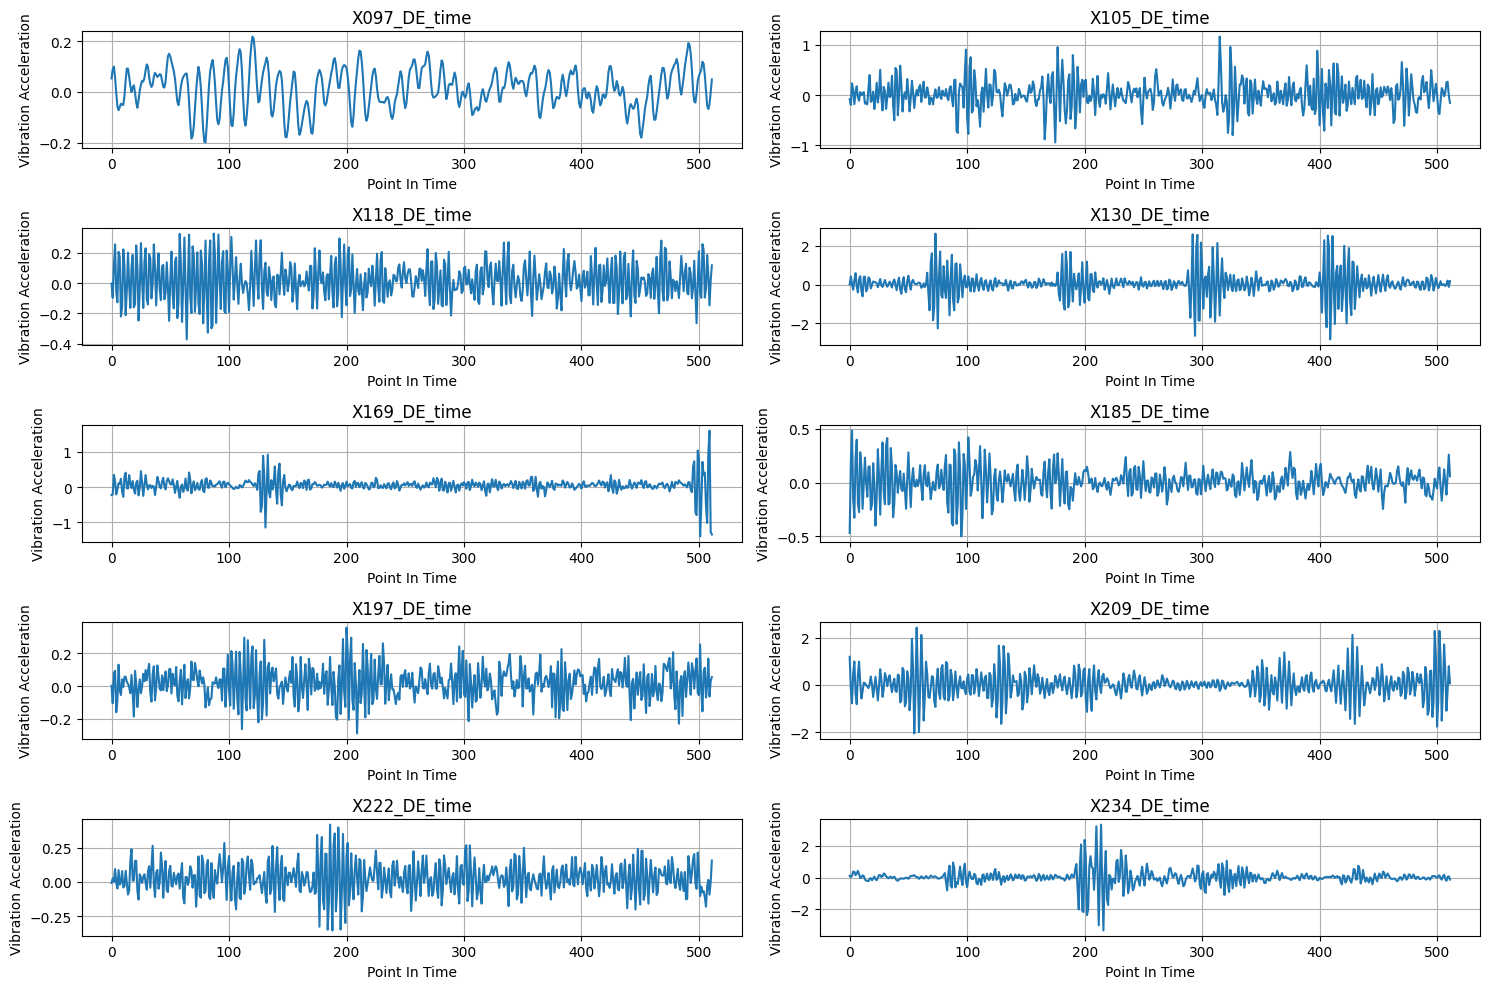

(        512
 0      97.0
 1      97.0
 2      97.0
 3      97.0
 4      97.0
 ...     ...
 4665  234.0
 4666  234.0
 4667  234.0
 4668  234.0
 4669  234.0
 
 [4670 rows x 1 columns],
            0         1         2         3         4         5         6    \
 0     0.053197  0.088662  0.099718  0.058621 -0.004590 -0.056952 -0.071764   
 1     0.106602  0.127881  0.128090  0.101387  0.056535  0.015438  0.014812   
 2     0.077396  0.096589  0.098258  0.083863  0.036090 -0.037759 -0.093877   
 3     0.052988  0.019610 -0.000209  0.003964  0.002086  0.006258 -0.014186   
 4     0.134766  0.085115  0.015020 -0.029623 -0.040263 -0.015229  0.012308   
 ...        ...       ...       ...       ...       ...       ...       ...   
 4665  0.058071  0.036954  0.109644  0.161217  0.204262  0.098273 -0.116953   
 4666 -0.182740  0.624563  1.323034 -0.688725 -0.784968  2.427187  1.570342   
 4667 -0.108019 -0.129542 -0.032487 -0.023959 -0.091776 -0.034924  0.153095   
 4668 -0.025177 -0.126293 

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
 
file_names = ['97.mat','105.mat','118.mat','130.mat','169.mat','185.mat','197.mat','209.mat','222.mat','234.mat']
 
for file in file_names:
    # 读取MAT文件
    data = loadmat(f'../data_files/ODS\\{file}')
    print(list(data.keys()))
# 采用驱动端数据
data_columns = ['X097_DE_time', 'X105_DE_time', 'X118_DE_time', 'X130_DE_time', 'X169_DE_time',
 
                'X185_DE_time','X197_DE_time','X209_DE_time','X222_DE_time','X234_DE_time']
 
columns_name = ['97','105','118','130','169','185','197','209','222',"234"]
 
data_12k_10c = pd.DataFrame()
for index in range(10):
    # 读取MAT文件
    data = loadmat(f'../data_files/ODS\\{file_names[index]}')
    dataList = data[data_columns[index]].reshape(-1)
    data_12k_10c[columns_name[index]] = dataList[:119808]  # 121048  min: 121265
import matplotlib.pyplot as plt
# 创建一个包含10个子图的图表
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))  # 创建5行2列的子图
# 展示前10个子集，每个子集包含100个元素
for i, ax in enumerate(axes.flat):  # 扁平化子图数组，方便遍历
    series=data_12k_10c[columns_name[i]].iloc[:512]
    ax.plot(series.index, series.values)
    ax.set_title(data_columns[i])
    ax.set_xlabel('Point In Time')
    ax.set_ylabel('Vibration Acceleration')
    ax.grid(True)

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()
# 定义滑动窗口大小和步长
window_size = 512
stride = int(window_size / 2)  # 此处使用了 50% 的重叠率
result_transpose_df=pd.DataFrame()
for futures_name in columns_name:
    data_array=data_12k_10c[futures_name]
    # 创建滑动窗口
    rolling_window = np.lib.stride_tricks.sliding_window_view(data_array, window_shape=window_size)
    # 提取具有给定步长的子数组
    rolling_window = rolling_window[::stride]
    for window_data in rolling_window:
        arr=window_data
        scalar_value = float(futures_name)
        # 使用 concatenate() 函数将标量追加到数组末尾
        new_arr = np.concatenate([arr, [scalar_value]])
        rolling_window_df=pd.DataFrame(new_arr)
                # 将滑动窗口中的数据组合成一个新的 DataFrame 对象
        result_transpose_df = pd.concat([result_transpose_df, rolling_window_df], axis=1, ignore_index=True)

result_df=result_transpose_df.transpose()
y_temp = result_df.iloc[:, -1:]
# 删除最后一列
result_df.drop(result_df.columns[-1], axis=1, inplace=True)
y_temp,result_df

# 短时傅里叶变换

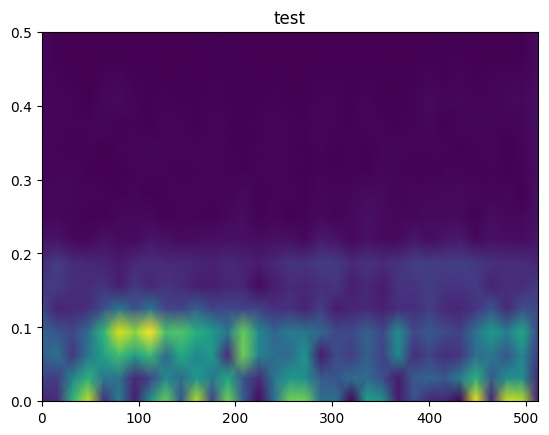

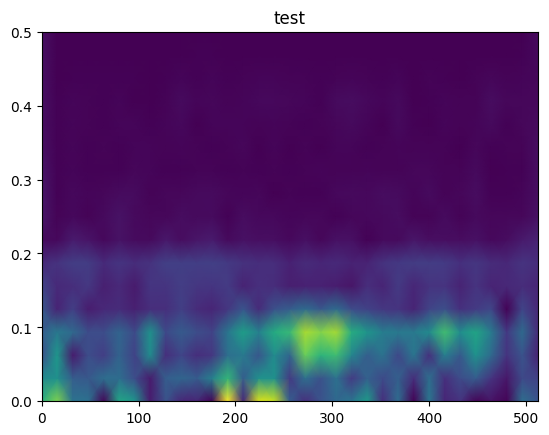

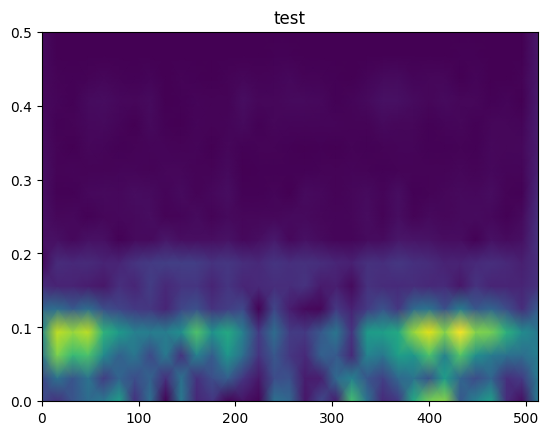

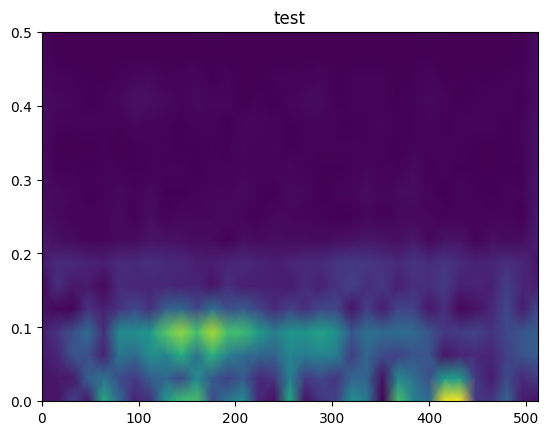

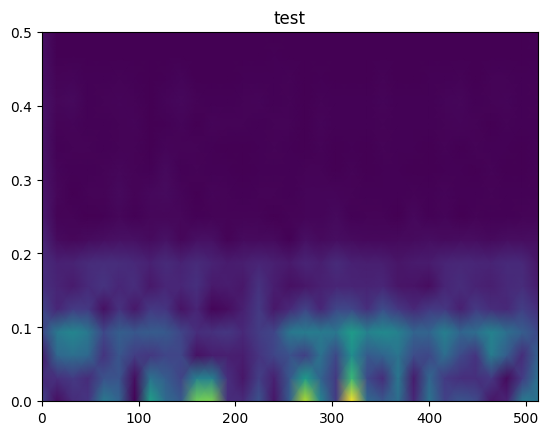

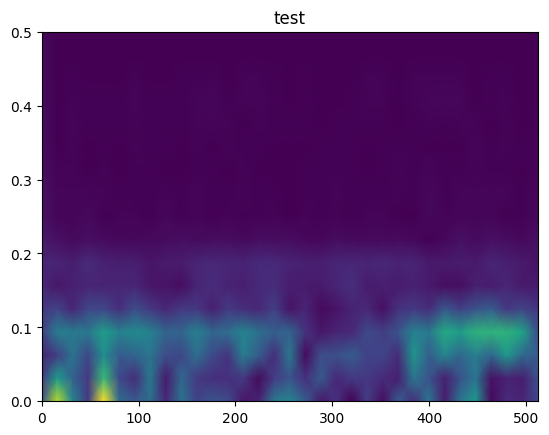

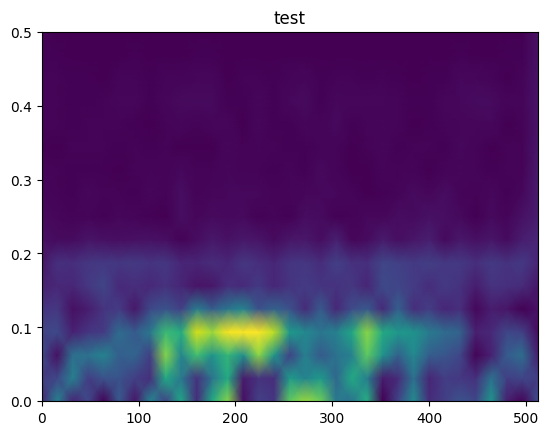

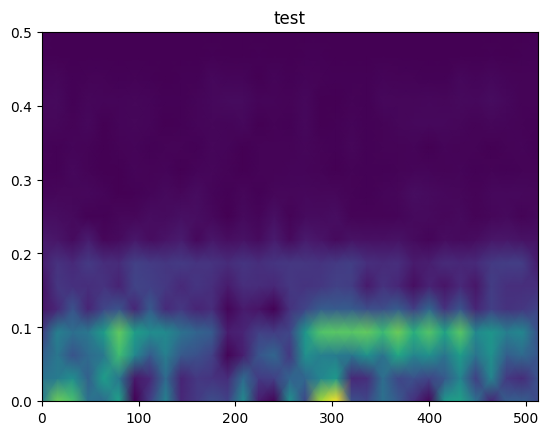

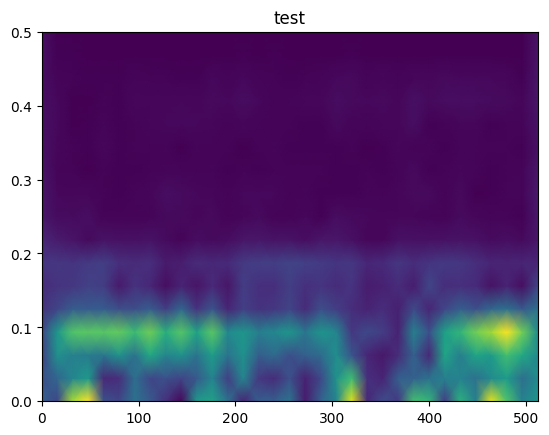

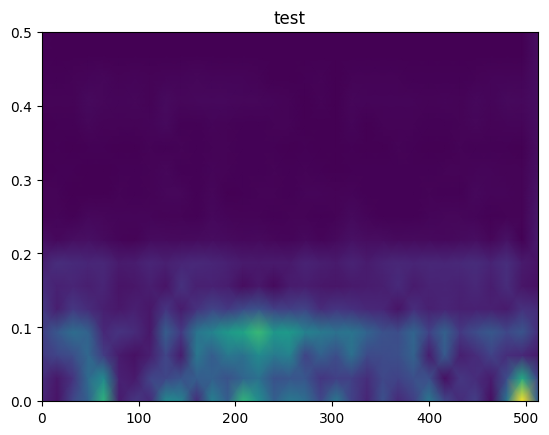

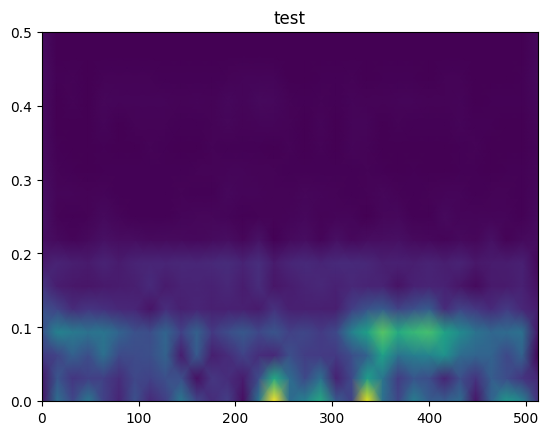

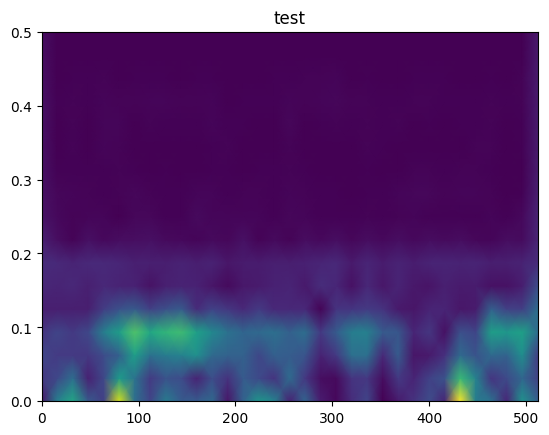

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [16]:
from scipy.signal import stft
# 设置STFT参数
window_size = 32  # 窗口大小
overlap = 0.5  # 重叠比例
Fs= 12000 # 采样率
# 计算重叠的样本数
overlap_samples = int(window_size * overlap)
"""
对于 frequencies1 变量，它实际上并不直接包含以Hz为单位的频率值,而是频率成分FFT bin的索引；
这些索引的范围从0到nperseg//2 + 1（对于实数输入）或nperseg（对于复数输入）；
其中nperseg是每段的样本数（在您的情况下是window_size）。
"""
for index, series in result_df.iterrows():
    series = result_df.iloc[index]
    frequencies1, times1, magnitude1 = stft(series, nperseg=window_size, noverlap=overlap_samples)
    #将这些索引转换为以Hz为单位的频率值可使用，
    # frequencies_hz = Fs * np.arange(frequencies1.shape[0]) / window_size  
    plt.pcolormesh(times1, frequencies1, np.abs(magnitude1), shading='gouraud')
    plt.title('test')
    plt.show()

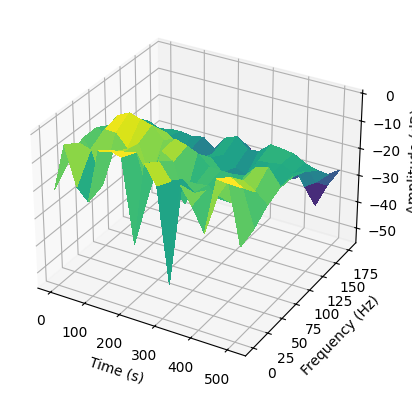